In [11]:
import numpy as np
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
path1 = 'inelasticDarkMatter/scan_search_higgs/'

In [13]:
def calc_mchi2(mchi1, ma, gx, f):
    vphi = ma / (2*gx)
    return mchi1 + 2*f*vphi

def calc_lim_ms2(alphad, ma):
    return ma**2 / (4*np.sqrt(np.pi)* alphad)


def calc_values(df_dat):
    mx1 = df_dat.column('Mx1')
    yf = df_dat.column('yf')
    vphi = df_dat.column('MAp') / (2*df_dat.column('gX'))
    mx2 = mx1 + 2*yf*vphi
    df_dat['Mx2'] =  mx2
    df_dat['delta'] = df_dat.column('Mx2') - df_dat.column('Mx1')
    df_dat['alphad'] = (df_dat.column('gX')**2)/(4*np.pi)
    df_dat['alphaf'] = (df_dat.column('yf')**2)/(4*np.pi)
    #df_dat['ratio_ms2_map'] = df_dat.column('Ms2')**2 / calc_lim_ms2(df_dat.column('alphad'),df_dat.column('MAp'))
    df_dat['mass_relative'] = df_dat.column('delta') / df_dat.column('Mx1')
    return df_dat

def convertir_elementos(df_):
    # Crear una copia del DataFrame original
    df = df_.copy() 
        
    # Convertir y redondear las columnas numéricas
    df['Mchi1'] = df['Mchi1'] 
    df['MAp'] = df['MAp'] 
    df['mphi'] = df['mphi'] 
    
    # Renombrar las columnas
    df = df.relabel('Mchi1', 'Mx1')
    df = df.relabel('Mchi2', 'Mx2')
    df = df.relabel('mphi', 'Ms2')
    df = df.relabel('ff', 'yf')
    df = df.relabel('angle', 'st')
    df = calc_values(df)
    return df 


def cargado_archivos(archivos):
    """
    Combina múltiples archivos CSV en una única tabla, manejando archivos vacíos o inexistentes.

    Args:
        archivos (list): Lista de rutas de archivos CSV.

    Returns:
        Table: Tabla combinada. Si no hay archivos válidos, retorna una tabla vacía.
    """
    datos = None  # Inicializamos como None para manejar el primer archivo válido

    for archivo in archivos:
        try:
            tabla_temp = Table.read_table(archivo)
            if tabla_temp.num_rows > 0:
                if datos is None:  # Primer archivo válido
                    datos = tabla_temp
                else:
                    datos.append(tabla_temp)  # Append a la tabla existente
        except FileNotFoundError:
            print(f"Error: {archivo} no existe.")
        except Exception as e:  # Otros errores (ej: formato incorrecto)
            print(f"Error al cargar {archivo}: {str(e)}")

    return Table() if datos is None else datos  # Retorna tabla vacía si no hay datos


#Los valores reportados por Planck
val_exp = 0.12 #Valor observado
error = 0.001 #Error reportado por Planck 
#Queremos que el valor sea calculado a 3 sigma, o sea, 3 veces el error reportado por Planck 
sigma = 3
val_por = sigma *  error 
val_min = round(val_exp - val_por,3)
val_max = round(val_exp + val_por,3)

def omega(df_):
    global val_min, val_max
    df = df_.copy()
    df['Densidad reliquia'] = np.round(df.column('Densidad reliquia'),3)
    return df.where('Densidad reliquia', are.between_or_equal_to(val_min,val_max))



In [72]:
def graficar_densidad_reliquia(df):
    plt.figure(figsize=(7, 5))  # Ancho mayor para 3 gráfico
    #plt.plot(df_5.column('Mx1'), df_5.column('Densidad reliquia'),'.',color='blue',alpha=0.5)
    plt.plot(df.column('Mx1'), df.column('Densidad reliquia'), 
             '.', color='blue', alpha=0.7, markersize=8)
    plt.axhline(y=val_min, color='red', linestyle='--', linewidth=1)
    plt.axhline(y=val_max, color='red', linestyle='--', linewidth=1)
    plt.ylabel(r'$\Omega h^2$', fontsize=14)
    plt.xlabel(r'$M_{\chi_{1}}$ (GeV)', fontsize=14)
    plt.ylim(0.115, 0.125)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xscale('log')
    plt.yscale('linear')
    plt.tight_layout()
    plt.xlim(1e-1, 4)


def graficar_epsilon(df):
    plt.figure(figsize=(10,7))
    plt.plot(df.column('Mx1'), df.column('epsilon') ,'.',color='blue',alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$\epsilon$',size=20)
    plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.legend(fontsize=12, framealpha=0.9, loc='best')
    #plt.title(r'$\Delta \geq 2m_{e}$',size=20)
    plt.xlim(1e-1, 4)


def graficar_y(df):
    alpha = df.column('alphad')[0]
    ratio = round((df.column('Mx1') / df.column('MAp')).item(0),3)
    factor = alpha * ratio**4 
    plt.figure(figsize=(10,7))
    plt.plot(df.column('Mx1'), df.column('epsilon')**2 * factor ,'.',color='blue',alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$y = \alpha_{D}\epsilon^2(M_{\chi_{1}}/M_{A^\prime})^{4}$',size=20)
    plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    #plt.title(r'$\Delta \geq 2m_{e}$',size=20)
    
    plt.xlim(1e-1, 4)

In [73]:
#limites
import pandas as pd

limit_nucal = pd.read_csv(f'{path1}nucal.txt', sep=' ',names=['Mx1','y'])
limit_belle = pd.read_csv(f'{path1}belleII.txt', sep=' ',names=['Mx1','y'])

In [74]:
archivos1 = [f'{path1}data_scan_higgs1.csv',
            f'{path1}data_scan_higgs2.csv',
            f'{path1}data_scan_higgs3.csv',
            f'{path1}data_scan_higgs4.csv',
            f'{path1}data_scan_higgs5.csv',
            f'{path1}data_scan_higgs6.csv',
            f'{path1}data_scan_higgs7.csv',]

df_higgs_search = cargado_archivos(archivos1)

df_higgs_search= convertir_elementos(df_higgs_search)
df_higgs_search = calc_values(df_higgs_search)
df_higgs_search.show(3)
df_higgs_search_omega = omega(df_higgs_search)
df_higgs_search_omega.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
6.02366,0.4,2.00789,0.00026,1.121,0.00030184,0.149466,2.81104,0.00418,6.70655,0.803155,0.1,0.00177778,0.4
1.21432,0.4,0.404774,0.00026,1.121,0.000396478,0.149466,0.566684,5.19e-05,7.19377,0.16191,0.1,0.00177778,0.4
1.95635,0.4,0.652117,0.00026,1.121,3.88603e-06,0.149466,0.912963,0.000203,7.17566,0.260847,0.1,0.00177778,0.4


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
0.966388,0.4,0.322129,0.00026,1.121,0.000256794,0.149466,0.450981,0.117,0.00421173,0.128852,0.1,0.00177778,0.4
0.966388,0.4,0.322129,0.00026,1.121,5.27864e-05,0.149466,0.450981,0.117,0.00421173,0.128852,0.1,0.00177778,0.4
0.964988,0.4,0.321663,0.00026,1.121,7.45568e-05,0.149466,0.450328,0.122,0.00186147,0.128665,0.1,0.00177778,0.4


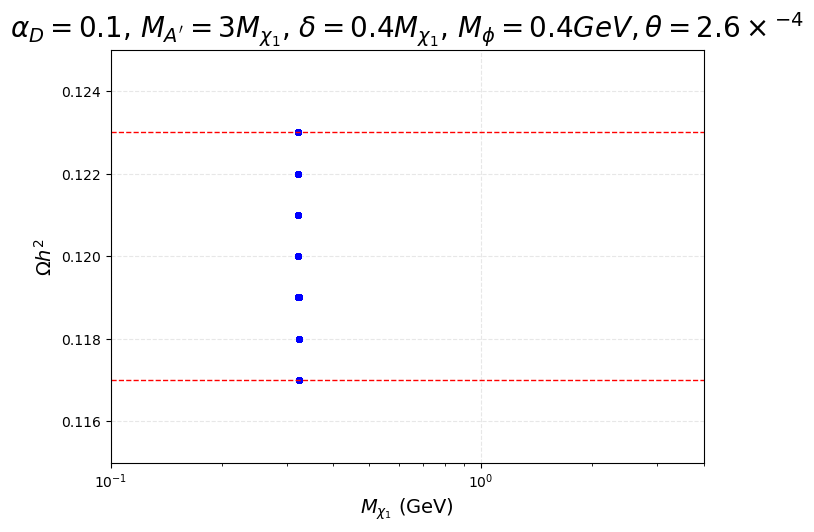

In [75]:
# Configuración de la figura
graficar_densidad_reliquia(df_higgs_search_omega)
plt.title(r'$\alpha_{D} = 0.1\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 0.4 M_{\chi_{1}} \text{, } M_{\phi} = 0.4 GeV, \theta = 2.6\times ^{-4}$',size=20, y=1.01)
plt.show()

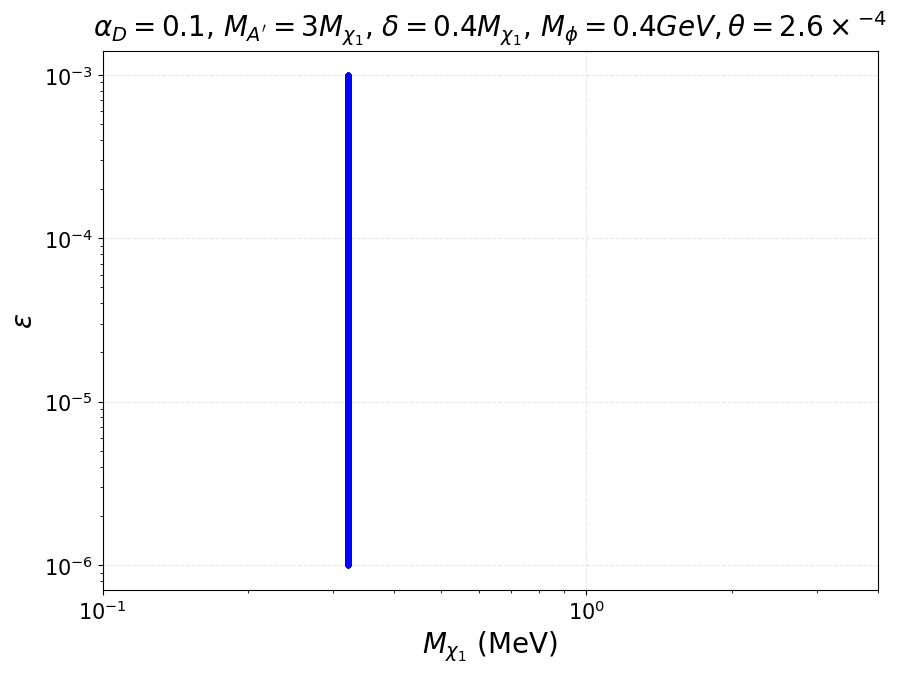

In [76]:
graficar_epsilon(df_higgs_search_omega)
plt.title(r'$\alpha_{D} = 0.1\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 0.4 M_{\chi_{1}} \text{, } M_{\phi} = 0.4 GeV, \theta = 2.6\times ^{-4}$',size=20, y=1.01)
plt.show()

/tmp/ipykernel_3140342/1912150501.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12, framealpha=0.9, loc='best')


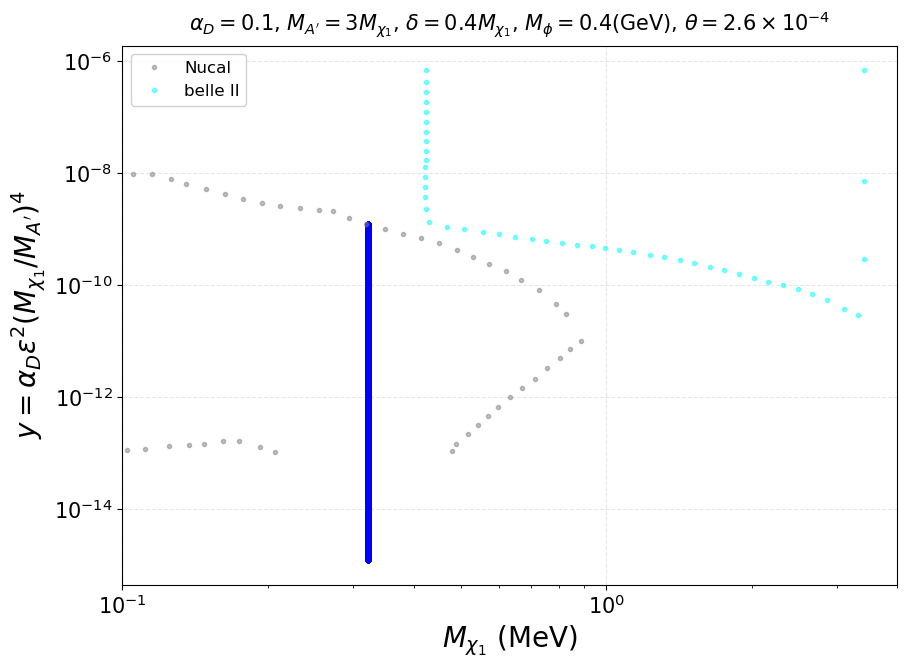

In [81]:
graficar_y(df_higgs_search_omega)
plt.plot(limit_nucal['Mx1'], limit_nucal['y'], '.', color='gray',alpha=0.5, label='Nucal')
plt.plot(limit_belle['Mx1'], limit_belle['y'], '.', color='aqua',alpha=0.5,label='belle II')
plt.title(r'$\alpha_{D} = 0.1\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 0.4 M_{\chi_{1}} \text{, } M_{\phi} = 0.4\text{(GeV), } \theta = 2.6\times 10^{-4}$',size=15, y=1.01)
plt.legend(fontsize=12, framealpha=0.9, loc='best')
plt.show()